In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.base import clone
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import time

In [2]:
decision_tree_results = {
    "0.2": {},
    "0.5": {},
    "0.8": {}
}

knn_results = {
    "0.2": {},
    "0.5": {},
    "0.8": {}
}

random_forest_results = {
    "0.2": {},
    "0.5": {},
    "0.8": {}
}

decision_tree_train = {
    "0.2": {},
    "0.5": {},
    "0.8": {}
}

knn_train = {
    "0.2": {},
    "0.5": {},
    "0.8": {}
}

random_forest_train = {
    "0.2": {},
    "0.5": {},
    "0.8": {}
}


In [3]:
# this function will help with calculating imbalance dataset
def ACC(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TP, FN, TN, FP = cm[1, 1], cm[1, 0], cm[0, 0], cm[0, 1]
    accuracy_positive = TP / (TP + FN)
    accuracy_negative = TN / (TN + FP)
    average_accuracy = (accuracy_positive + accuracy_negative) / 2
    return average_accuracy

In [4]:
###Three Datasets###

### car_evaluation dataset 
# explanation of the dataset: derived from simple hierarchical decision model, this 
# database may be useful for testing constructive induction and structure discovery methods.
car_evaluation = fetch_ucirepo(id=19) 
# data (as pandas dataframes) 
X_car = car_evaluation.data.features 
y_car = car_evaluation.data.targets 


### abalone dataset:
# explanation of the dataset: predict the age of abalone from physical measurements
abalone = fetch_ucirepo(id=1) 
# data (as pandas dataframes) 
X_abalone = abalone.data.features 
y_abalone = abalone.data.targets 


### spambase dataset 
# explanation of the dataset: classifying Email as Spam or Non-Spam
spambase = fetch_ucirepo(id=94) 
# data (as pandas dataframes) 
X_spam = spambase.data.features 
y_spam = spambase.data.targets 

#check the class distribution before encoding
class_distribution = y_car.value_counts()
print(class_distribution)
class_distribution = y_abalone.value_counts()
print(class_distribution)
class_distribution = y_spam.value_counts()
print(class_distribution)

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64
Rings
9        689
10       634
8        568
11       487
7        391
12       267
6        259
13       203
14       126
5        115
15       103
16        67
17        58
4         57
18        42
19        32
20        26
3         15
21        14
23         9
22         6
27         2
24         2
26         1
1          1
25         1
2          1
29         1
Name: count, dtype: int64
Class
0        2788
1        1813
Name: count, dtype: int64


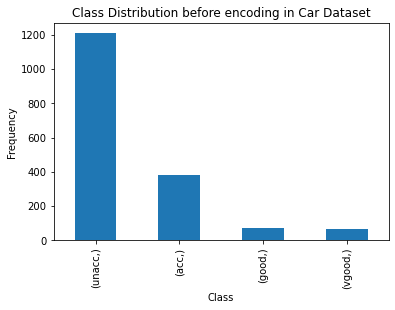

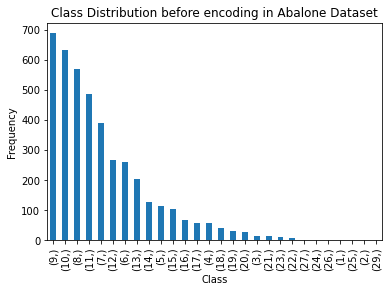

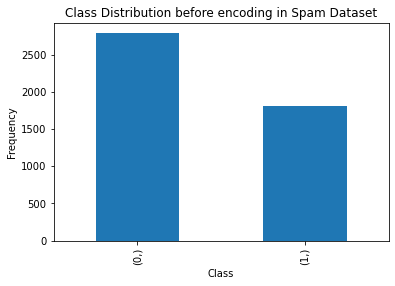

In [5]:
#plot the distribution graph before encoding
class_distribution_car = y_car.value_counts()
class_distribution_car.plot(kind='bar')
plt.title('Class Distribution before encoding in Car Dataset')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()
class_distribution_abalone = y_abalone.value_counts()
class_distribution_abalone.plot(kind='bar')
plt.title('Class Distribution before encoding in Abalone Dataset')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()
class_distribution_spam = y_spam.value_counts()
class_distribution_spam.plot(kind='bar')
plt.title('Class Distribution before encoding in Spam Dataset')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [6]:
###encode categorical data

#car_evaluation
encoder = {}
for column in X_car.columns:
    encoder[column] = LabelEncoder()
    X_car[column] = encoder[column].fit_transform(X_car[column])
# if car condition is unaccept, encode as 0, otherwise, encode as 1    
y_car['class'] = y_car['class'].apply(lambda x: 0 if x == 'unacc' else 1)


#abalone
encoder = LabelEncoder()
# 0 if 0-9, 1 if 10 and above
X_abalone['Sex'] = encoder.fit_transform(X_abalone['Sex'])
y_abalone['Rings'] = y_abalone['Rings'].apply(lambda x: 0 if x < 10 else 1)

#spambase do not need to encode

#check the class distribution after encoding
class_distribution = y_car.value_counts()
print(class_distribution)
class_distribution = y_abalone.value_counts()
print(class_distribution)
class_distribution = y_spam.value_counts()
print(class_distribution)

class
0        1210
1         518
Name: count, dtype: int64
Rings
0        2096
1        2081
Name: count, dtype: int64
Class
0        2788
1        1813
Name: count, dtype: int64


/tmp/ipykernel_4014/2321039091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_car[column] = encoder[column].fit_transform(X_car[column])
/tmp/ipykernel_4014/2321039091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_car[column] = encoder[column].fit_transform(X_car[column])
/tmp/ipykernel_4014/2321039091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

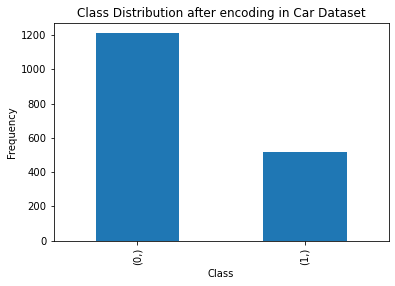

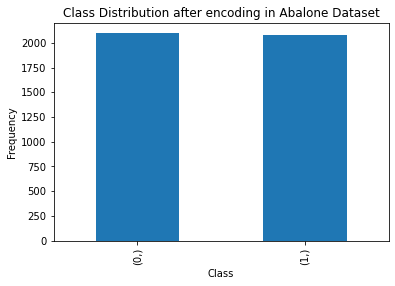

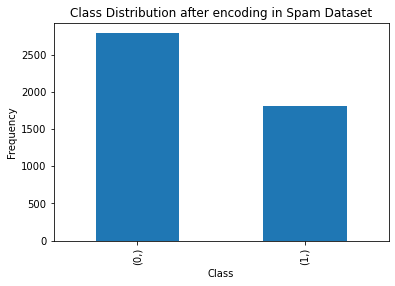

In [7]:
#plot the distribution graph after encoding
class_distribution_car = y_car.value_counts()
class_distribution_car.plot(kind='bar')
plt.title('Class Distribution after encoding in Car Dataset')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()
class_distribution_abalone = y_abalone.value_counts()
class_distribution_abalone.plot(kind='bar')
plt.title('Class Distribution after encoding in Abalone Dataset')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()
class_distribution_spam = y_spam.value_counts()
class_distribution_spam.plot(kind='bar')
plt.title('Class Distribution after encoding in Spam Dataset')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [8]:
def plot_grid_search_heatmap(cv_results, param_grid, param_name_1, param_name_2):
    scores_matrix = cv_results['mean_test_score'].reshape(len(param_grid[param_name_2]), len(param_grid[param_name_1])) 
    plt.figure(figsize=(12, 8))
    sns.heatmap(scores_matrix, annot=True, fmt=".3f", xticklabels=param_grid[param_name_1], yticklabels=param_grid[param_name_2], cmap="YlGnBu")
    plt.title(f'Grid Search Scores ({param_name_1} vs {param_name_2})')
    plt.xlabel(param_name_1)
    plt.ylabel(param_name_2)  
    filename = f"grid_search_plot_{time.strftime('%Y%m%d-%H%M%S')}.png"
    #plt.savefig(filename, bbox_inches='tight')
    plt.show()
    #plt.close()
#plot_grid_search_heatmap(grid_search.cv_results_, param_grid, 'n_estimators', 'max_depth')

In [9]:
def plot_single_hyperparameter(cv_results, param_name):
    param_values = list(cv_results['param_' + param_name])
    mean_scores = cv_results['mean_test_score']
    plt.figure(figsize=(10, 6))
    plt.plot(param_values, mean_scores, marker='o')
    plt.title(f'Grid Search Scores for {param_name}')
    plt.xlabel(param_name)
    plt.ylabel('Mean CV Score')
    plt.grid(True)
    filename = f"grid_search_plot_{time.strftime('%Y%m%d-%H%M%S')}.png"
    plt.savefig(filename, bbox_inches='tight')
    plt.show()
    plt.close()
#plot_single_hyperparameter(grid_search.cv_results_, 'n_estimators')

**Decision Tree**

In [10]:
#cross validation and hyperparameters tune for decision tree
custom_scorer = make_scorer(ACC)
def tune_hyperparameters(estimator, param_grid, X, y, test_size, n_splits=5):
    """
    Perform hyperparameter tuning using GridSearchCV.

    Parameters:
    - estimator: The machine learning model for which to tune parameters.
    - param_grid: Dictionary with parameters names as keys and lists of parameter settings to try as values.
    - X: Feature matrix.
    - y: Target vector.
    - n_splits: Number of folds for cross-validation.
    - scoring: Metric to be used for evaluation.

    Returns:
    - best_estimator: The estimator with the best parameters.
    - best_params: Parameter setting that gave the best results on the hold out data.
    - best_score: Mean cross-validated score of the best_estimator.
    """
    accuracies = []
    
    for i in range(3):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
        # Create the GridSearchCV object
        grid_search = GridSearchCV(estimator, 
                                   param_grid, 
                                   cv=n_splits, 
                                   scoring=custom_scorer, 
                                   n_jobs=-1, 
                                   verbose=1)

        # Fit GridSearchCV
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        #accuracy = accuracy_score(y_test, y_pred)
        imbalanced_accuracy = ACC(y_test, y_pred)
        accuracies.append(imbalanced_accuracy)
    average_accuracy = sum(accuracies) / 3
    return average_accuracy, grid_search.best_params_, grid_search.best_score_, grid_search.cv_results_


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits


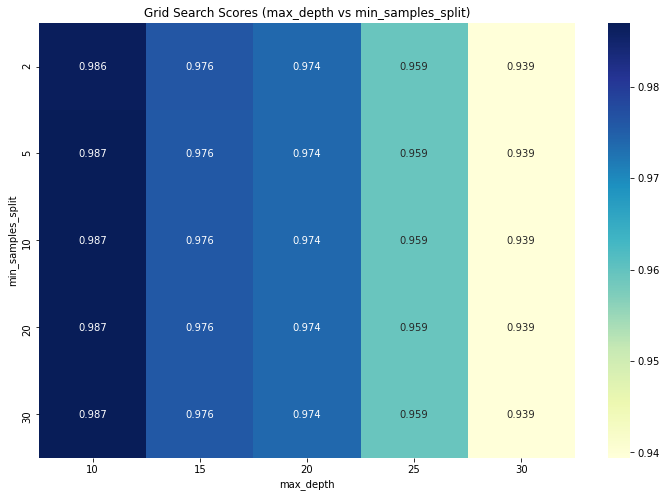

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits


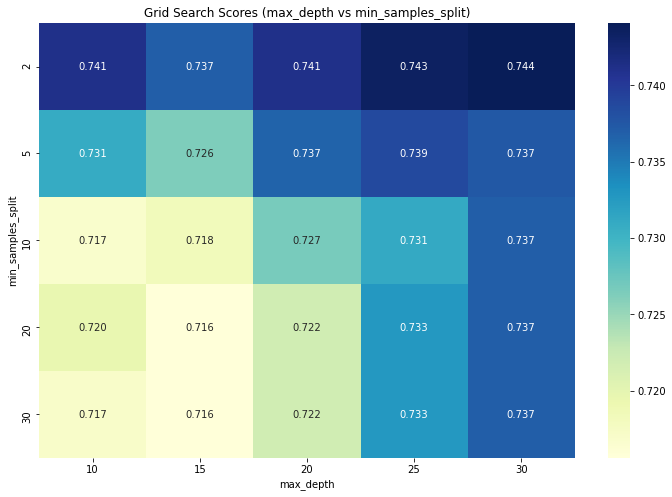

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits


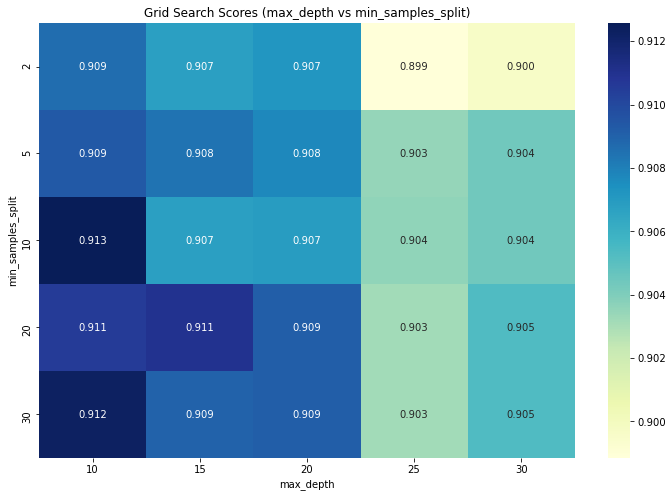



Best train_car score: 0.9869899611398966 
test_car_accuracy: 0.9916116872408717 
Best car parameters: {'max_depth': 15, 'min_samples_split': 2}


Best train_abalone score: 0.744087725785487 
test_abalone_accuracy: 0.7768113398682193 
Best abalone parameters: {'max_depth': 10, 'min_samples_split': 30}


Best train_spam score: 0.9125758571010383 
test_spam_accuracy: 0.9168474369328511 
Best spam parameters: {'max_depth': 20, 'min_samples_split': 2}


In [11]:
###80/20
estimator = DecisionTreeClassifier(criterion='entropy', random_state=42)
#parameters we want to do the gird search

param_grid = {'max_depth': [10, 15, 20, 25, 30],
              'min_samples_split': [2, 5, 10, 20, 30]}


#test_accuracy is the accuracy on test set based on teh best parameters we get.
#best_score is the accuracy on traning set based on teh best parameters we get.
#best_params is the best parameters we get from cross validation and hyperparameters we tuned.

test_accuracy_car, best_params_car, best_score_car, result = tune_hyperparameters(estimator, param_grid, X_car, y_car, 0.2)
plot_grid_search_heatmap(result, param_grid, 'max_depth', 'min_samples_split')
test_accuracy_abalone, best_params_abalone, best_score_abalone, result = tune_hyperparameters(estimator, param_grid, X_abalone, y_abalone, 0.2)
plot_grid_search_heatmap(result, param_grid, 'max_depth', 'min_samples_split')
test_accuracy_spam, best_params_spam, best_score_spam, result = tune_hyperparameters(estimator, param_grid, X_spam, y_spam, 0.2)
plot_grid_search_heatmap(result, param_grid, 'max_depth', 'min_samples_split')

print('\n\nBest train_car score:', best_score_car, '\ntest_car_accuracy:', test_accuracy_car, '\nBest car parameters:', best_params_car)
print('\n\nBest train_abalone score:', best_score_abalone, '\ntest_abalone_accuracy:', test_accuracy_abalone, '\nBest abalone parameters:', best_params_abalone)
print('\n\nBest train_spam score:', best_score_spam,'\ntest_spam_accuracy:', test_accuracy_spam,  '\nBest spam parameters:', best_params_spam)

#Store the data
decision_tree_results["0.2"]["car"] = test_accuracy_car
decision_tree_results["0.2"]["abalone"] = test_accuracy_abalone
decision_tree_results["0.2"]["spam"] = test_accuracy_spam

decision_tree_train["0.2"]["car"] = best_score_car
decision_tree_train["0.2"]["abalone"] = best_score_abalone
decision_tree_train["0.2"]["spam"] = best_score_spam

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits


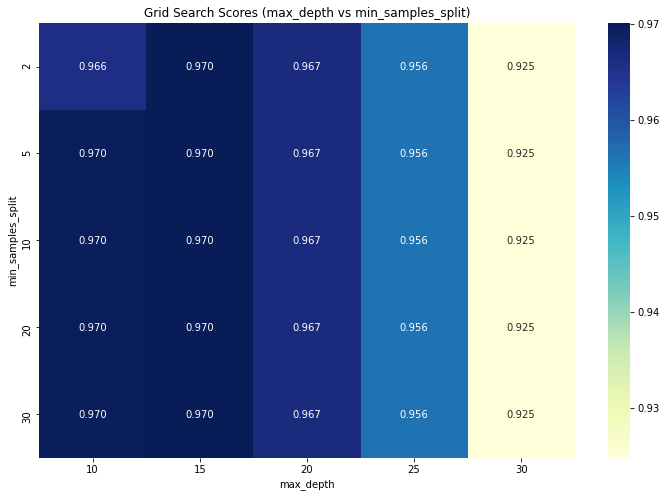

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits


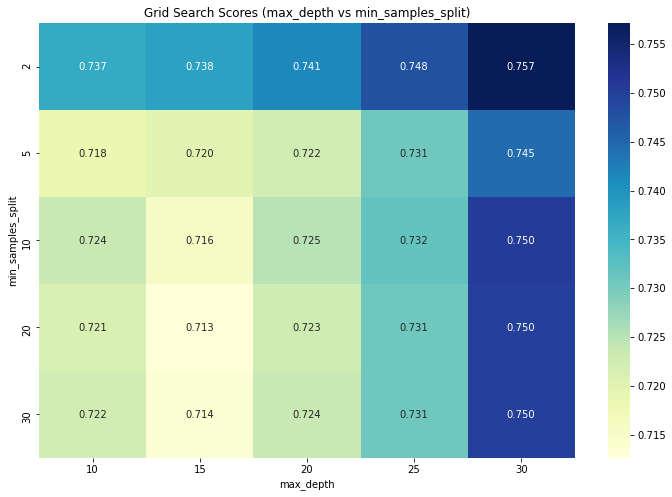

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits


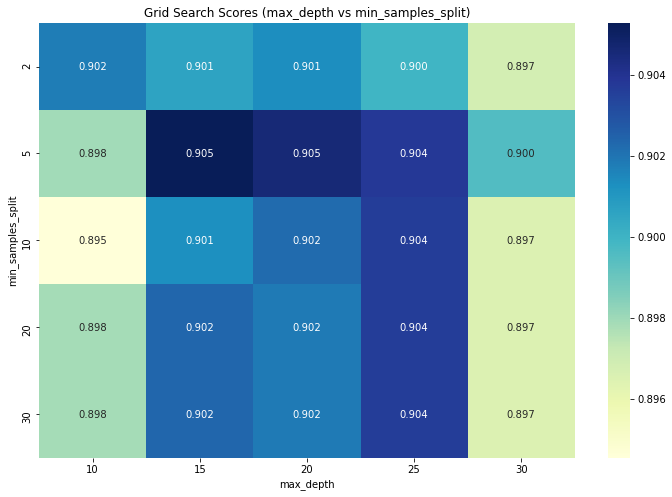



Best train_car score: 0.9701154705785923 
test_car_accuracy: 0.9760003772678975 
Best car parameters: {'max_depth': 10, 'min_samples_split': 5}


Best train_abalone score: 0.7571648161779742 
test_abalone_accuracy: 0.7616926174636008 
Best abalone parameters: {'max_depth': 10, 'min_samples_split': 30}


Best train_spam score: 0.9052888812508311 
test_spam_accuracy: 0.894201654074649 
Best spam parameters: {'max_depth': 15, 'min_samples_split': 5}


In [12]:
###50/50
estimator = DecisionTreeClassifier(criterion='entropy', random_state=42)
#parameters we want to do the gird search

param_grid = {'max_depth': [10, 15, 20, 25, 30],
              'min_samples_split': [2, 5, 10, 20, 30]}


#test_accuracy is the accuracy on test set based on teh best parameters we get.
#best_score is the accuracy on traning set based on teh best parameters we get.
#best_params is the best parameters we get from cross validation and hyperparameters we tuned.

test_accuracy_car, best_params_car, best_score_car, result = tune_hyperparameters(estimator, param_grid, X_car, y_car, 0.5)
plot_grid_search_heatmap(result, param_grid, 'max_depth', 'min_samples_split')
test_accuracy_abalone, best_params_abalone, best_score_abalone, result = tune_hyperparameters(estimator, param_grid, X_abalone, y_abalone, 0.5)
plot_grid_search_heatmap(result, param_grid, 'max_depth', 'min_samples_split')
test_accuracy_spam, best_params_spam, best_score_spam, result = tune_hyperparameters(estimator, param_grid, X_spam, y_spam, 0.5)
plot_grid_search_heatmap(result, param_grid, 'max_depth', 'min_samples_split')
print('\n\nBest train_car score:', best_score_car, '\ntest_car_accuracy:', test_accuracy_car, '\nBest car parameters:', best_params_car)
print('\n\nBest train_abalone score:', best_score_abalone, '\ntest_abalone_accuracy:', test_accuracy_abalone, '\nBest abalone parameters:', best_params_abalone)
print('\n\nBest train_spam score:', best_score_spam,'\ntest_spam_accuracy:', test_accuracy_spam,  '\nBest spam parameters:', best_params_spam)

#Store the data
decision_tree_results["0.5"]["car"] = test_accuracy_car
decision_tree_results["0.5"]["abalone"] = test_accuracy_abalone
decision_tree_results["0.5"]["spam"] = test_accuracy_spam

decision_tree_train["0.5"]["car"] = best_score_car
decision_tree_train["0.5"]["abalone"] = best_score_abalone
decision_tree_train["0.5"]["spam"] = best_score_spam

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits


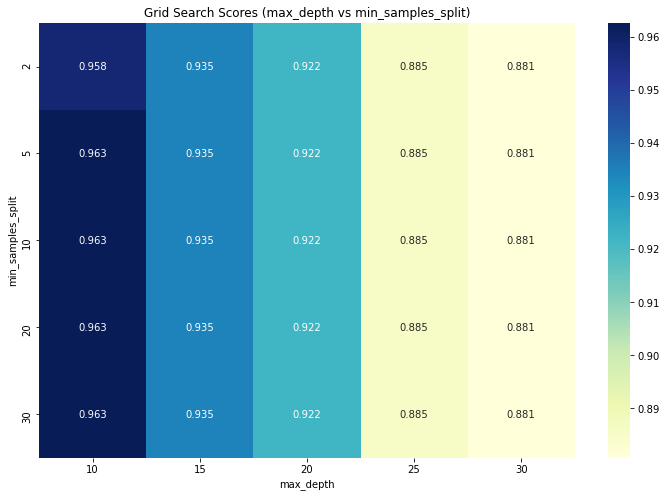

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits


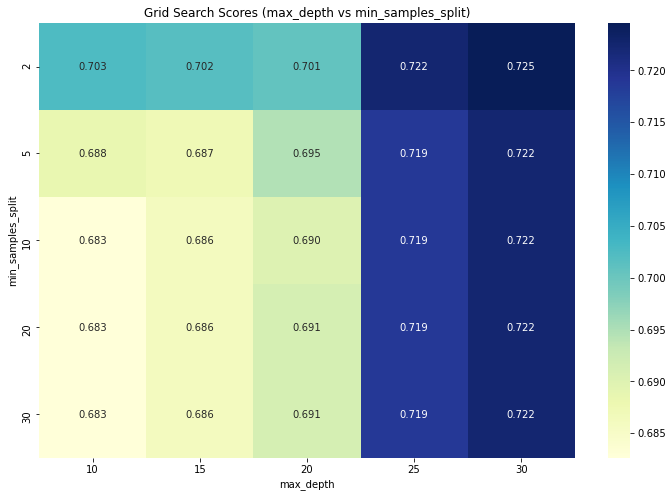

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits


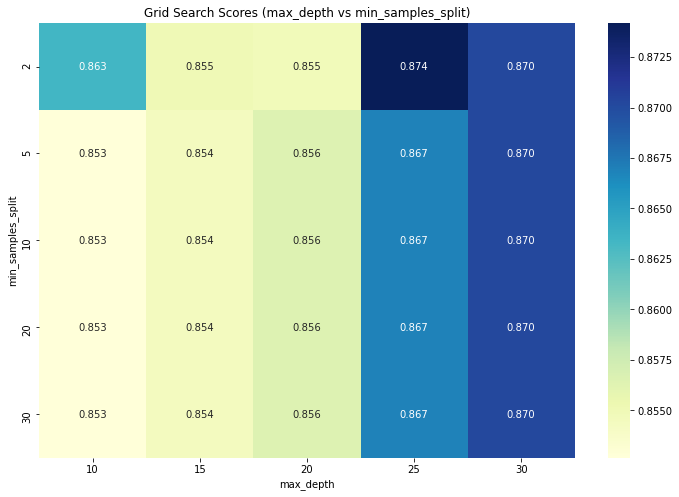



Best train_car score: 0.9626692456479692 
test_car_accuracy: 0.942103227758946 
Best car parameters: {'max_depth': 15, 'min_samples_split': 2}


Best train_abalone score: 0.7245702012806298 
test_abalone_accuracy: 0.7521126874293099 
Best abalone parameters: {'max_depth': 10, 'min_samples_split': 30}


Best train_spam score: 0.874185463659148 
test_spam_accuracy: 0.8750241614220097 
Best spam parameters: {'max_depth': 10, 'min_samples_split': 20}


In [13]:
###20/80
estimator = DecisionTreeClassifier(criterion='entropy', random_state=42)
#parameters we want to do the gird search

param_grid = {'max_depth': [10, 15, 20, 25, 30],
              'min_samples_split': [2, 5, 10, 20, 30]}


#test_accuracy is the accuracy on test set based on teh best parameters we get.
#best_score is the accuracy on traning set based on teh best parameters we get.
#best_params is the best parameters we get from cross validation and hyperparameters we tuned.

test_accuracy_car, best_params_car, best_score_car, result = tune_hyperparameters(estimator, param_grid, X_car, y_car, 0.8)
plot_grid_search_heatmap(result, param_grid, 'max_depth', 'min_samples_split')
test_accuracy_abalone, best_params_abalone, best_score_abalone, result = tune_hyperparameters(estimator, param_grid, X_abalone, y_abalone, 0.8)
plot_grid_search_heatmap(result, param_grid, 'max_depth', 'min_samples_split')
test_accuracy_spam, best_params_spam, best_score_spam, result = tune_hyperparameters(estimator, param_grid, X_spam, y_spam, 0.8)
plot_grid_search_heatmap(result, param_grid, 'max_depth', 'min_samples_split')

print('\n\nBest train_car score:', best_score_car, '\ntest_car_accuracy:', test_accuracy_car, '\nBest car parameters:', best_params_car)
print('\n\nBest train_abalone score:', best_score_abalone, '\ntest_abalone_accuracy:', test_accuracy_abalone, '\nBest abalone parameters:', best_params_abalone)
print('\n\nBest train_spam score:', best_score_spam,'\ntest_spam_accuracy:', test_accuracy_spam,  '\nBest spam parameters:', best_params_spam)

#Store the data
decision_tree_results["0.8"]["car"] = test_accuracy_car
decision_tree_results["0.8"]["abalone"] = test_accuracy_abalone
decision_tree_results["0.8"]["spam"] = test_accuracy_spam

decision_tree_train["0.8"]["car"] = best_score_car
decision_tree_train["0.8"]["abalone"] = best_score_abalone
decision_tree_train["0.8"]["spam"] = best_score_spam

**KNN**

In [14]:
def tune_knn_hyperparameters(X, y, param_grid, scoring, test_size, cv=5):
    """
    Tune hyperparameters for a KNN classifier using GridSearchCV with cross-validation.

    :param X: Feature matrix
    :param y: Target vector
    :param param_grid: Dictionary with parameters names (`str`) as keys and lists of parameter settings to try as values
    :param cv: Number of folds in cross-validation
    :param scoring: Scoring method used to evaluate the performance of the classifier

    :return: A tuple of (best_estimator, best_params, best_score)
    """
    accuracies = []
    
    for i in range(3):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
        # Create a KNN object
        knn = KNeighborsClassifier()

        # Create a pipeline with scaling and KNN
        pipeline = Pipeline([
            ('scaler', StandardScaler()), 
            ('knn', knn)
        ])

        # Setup the GridSearchCV object
        grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring=scoring)

        # Fit it to the data
        grid_search.fit(X_train, y_train)

        # Get the best estimator, parameters, and score
        best_estimator = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_


        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        #accuracy = accuracy_score(y_test, y_pred)
        imbalanced_accuracy = ACC(y_test, y_pred)
        accuracies.append(imbalanced_accuracy)
    average_accuracy = sum(accuracies) / 3
    return average_accuracy, best_params, best_score, grid_search.cv_results_


CAR



/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

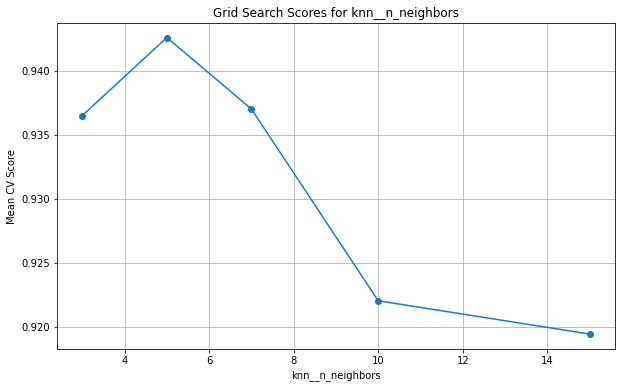



Best train_car score: 0.9425946058475205 
test_car_accuracy: 0.9738088289085245 
Best car parameters: {'knn__n_neighbors': 5}
Abalone



/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

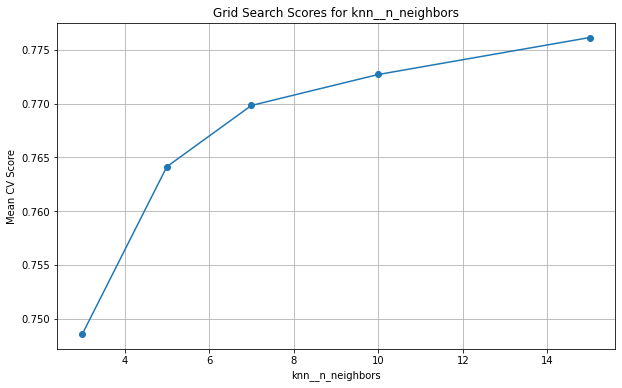

/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7450e7cc10>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version




Best train_abalone score: 0.7761501133329491 
test_abalone_accuracy: 0.7880655662890392 
Best abalone parameters: {'knn__n_neighbors': 15}
SPAM



/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7450e7cc10>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version


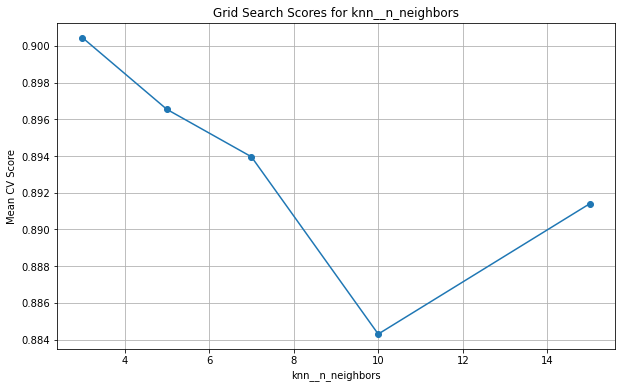



Best train_spam score: 0.9004541631530298 
test_spam_accuracy: 0.9010509836957001 
Best spam parameters: {'knn__n_neighbors': 3}


In [15]:
###80/20
# custom_scorer is imbalance accuracy
# Print the imbalanced results

custom_scorer = make_scorer(ACC)
# Define the parameter grid
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 10, 15]
}

##CAR
print("CAR\n")
imbalanced_accuracy, best_params, best_score, result = tune_knn_hyperparameters(X_car, y_car, param_grid, custom_scorer, 0.2)
plot_single_hyperparameter(result, 'knn__n_neighbors')
print('\n\nBest train_car score:', best_score, '\ntest_car_accuracy:', imbalanced_accuracy, '\nBest car parameters:', best_params)
knn_results["0.2"]["car"] = imbalanced_accuracy
knn_train["0.2"]["car"] = best_score

##Abalone
print("Abalone\n")
imbalanced_accuracy, best_params, best_score, result = tune_knn_hyperparameters(X_abalone, y_abalone, param_grid, custom_scorer, 0.2)
plot_single_hyperparameter(result, 'knn__n_neighbors')
print('\n\nBest train_abalone score:', best_score, '\ntest_abalone_accuracy:', imbalanced_accuracy, '\nBest abalone parameters:', best_params)
knn_results["0.2"]["abalone"] = imbalanced_accuracy
knn_train["0.2"]["abalone"] = best_score

##SPAM
print("SPAM\n")
imbalanced_accuracy, best_params, best_score ,result = tune_knn_hyperparameters(X_spam, y_spam, param_grid, custom_scorer, 0.2)
plot_single_hyperparameter(result, 'knn__n_neighbors')
print('\n\nBest train_spam score:', best_score, '\ntest_spam_accuracy:', imbalanced_accuracy, '\nBest spam parameters:', best_params)
knn_results["0.2"]["spam"] = imbalanced_accuracy
knn_train["0.2"]["spam"] = best_score

CAR



/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

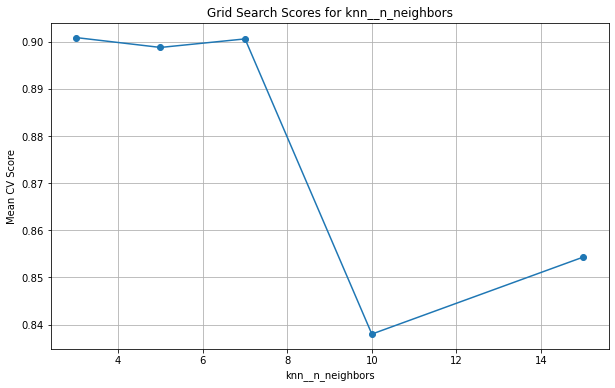



Best train_car score: 0.9009196064084571 
test_car_accuracy: 0.9244034123177652 
Best car parameters: {'knn__n_neighbors': 3}
Abalone



/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

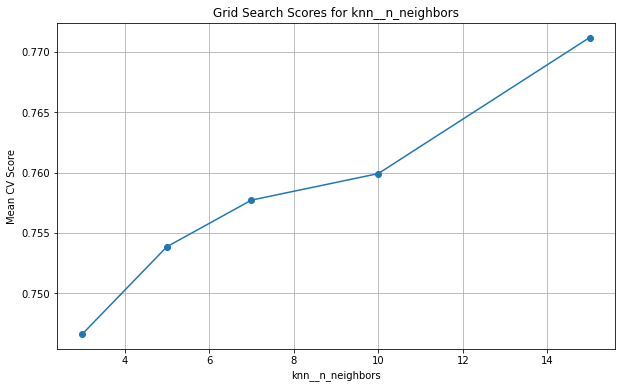

/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f727dea2790>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version




Best train_abalone score: 0.7711648337678086 
test_abalone_accuracy: 0.7840570808893009 
Best abalone parameters: {'knn__n_neighbors': 15}
SPAM



/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7280169ca0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version


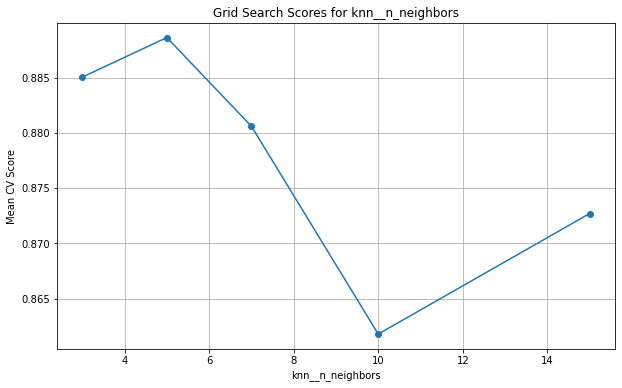



Best train_spam score: 0.8886157434517796 
test_spam_accuracy: 0.8851587800166681 
Best spam parameters: {'knn__n_neighbors': 5}


In [16]:
###50/50
# custom_scorer is imbalance accuracy
# Print the imbalanced results

custom_scorer = make_scorer(ACC)
# Define the parameter grid
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 10, 15]
}

##CAR
print("CAR\n")
imbalanced_accuracy, best_params, best_score, result = tune_knn_hyperparameters(X_car, y_car, param_grid, custom_scorer, 0.5)
plot_single_hyperparameter(result, 'knn__n_neighbors')
print('\n\nBest train_car score:', best_score, '\ntest_car_accuracy:', imbalanced_accuracy, '\nBest car parameters:', best_params)
knn_results["0.5"]["car"] = imbalanced_accuracy
knn_train["0.5"]["car"] = best_score

##Abalone
print("Abalone\n")
imbalanced_accuracy, best_params, best_score, result = tune_knn_hyperparameters(X_abalone, y_abalone, param_grid, custom_scorer, 0.5)
plot_single_hyperparameter(result, 'knn__n_neighbors')
print('\n\nBest train_abalone score:', best_score, '\ntest_abalone_accuracy:', imbalanced_accuracy, '\nBest abalone parameters:', best_params)
knn_results["0.5"]["abalone"] = imbalanced_accuracy
knn_train["0.5"]["abalone"] = best_score

##SPAM
print("SPAM\n")
imbalanced_accuracy, best_params, best_score, result = tune_knn_hyperparameters(X_spam, y_spam, param_grid, custom_scorer, 0.5)
plot_single_hyperparameter(result, 'knn__n_neighbors')
print('\n\nBest train_spam score:', best_score, '\ntest_spam_accuracy:', imbalanced_accuracy, '\nBest spam parameters:', best_params)
knn_results["0.5"]["spam"] = imbalanced_accuracy
knn_train["0.5"]["spam"] = best_score

CAR



/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

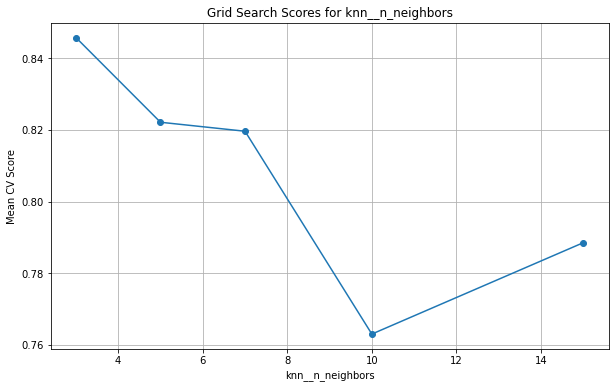



Best train_car score: 0.8458149120383164 
test_car_accuracy: 0.864547350506322 
Best car parameters: {'knn__n_neighbors': 3}
Abalone



/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

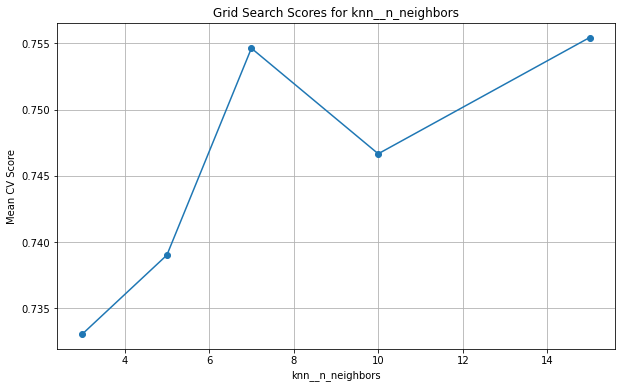

/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7450e9ab80>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version




Best train_abalone score: 0.7554266049646423 
test_abalone_accuracy: 0.7702785622476833 
Best abalone parameters: {'knn__n_neighbors': 15}
SPAM



/home/yuyin/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7450e9ab80>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version


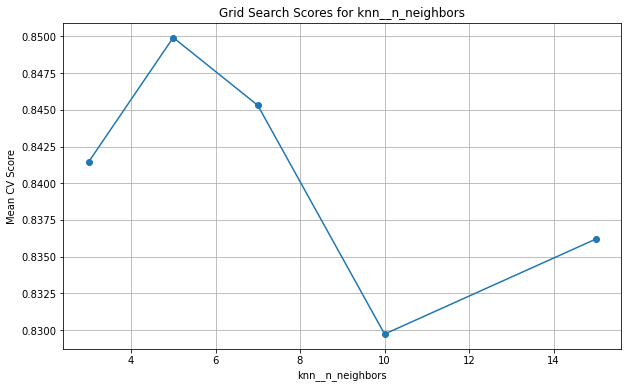



Best train_spam score: 0.8499171842650103 
test_spam_accuracy: 0.8597081478348331 
Best spam parameters: {'knn__n_neighbors': 5}


In [17]:
###20/80
# custom_scorer is imbalance accuracy
# Print the imbalanced results

custom_scorer = make_scorer(ACC)
# Define the parameter grid
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 10, 15]
}

##CAR
print("CAR\n")
imbalanced_accuracy, best_params, best_score, result = tune_knn_hyperparameters(X_car, y_car, param_grid, custom_scorer, 0.8)
plot_single_hyperparameter(result, 'knn__n_neighbors')
print('\n\nBest train_car score:', best_score, '\ntest_car_accuracy:', imbalanced_accuracy, '\nBest car parameters:', best_params)
knn_results["0.8"]["car"] = imbalanced_accuracy
knn_train["0.8"]["car"] = best_score

##Abalone
print("Abalone\n")
imbalanced_accuracy, best_params, best_score, result = tune_knn_hyperparameters(X_abalone, y_abalone, param_grid, custom_scorer, 0.8)
plot_single_hyperparameter(result, 'knn__n_neighbors')
print('\n\nBest train_abalone score:', best_score, '\ntest_abalone_accuracy:', imbalanced_accuracy, '\nBest abalone parameters:', best_params)
knn_results["0.8"]["abalone"] = imbalanced_accuracy
knn_train["0.8"]["abalone"] = best_score

##SPAM
print("SPAM\n")
imbalanced_accuracy, best_params, best_score, result = tune_knn_hyperparameters(X_spam, y_spam, param_grid, custom_scorer, 0.8)
plot_single_hyperparameter(result, 'knn__n_neighbors')
print('\n\nBest train_spam score:', best_score, '\ntest_spam_accuracy:', imbalanced_accuracy, '\nBest spam parameters:', best_params)
knn_results["0.8"]["spam"] = imbalanced_accuracy
knn_train["0.8"]["spam"] = best_score

**Random forest**

In [18]:
def tune_evaluate_random_forest(X, y, param_grid, scoring, test_size, cv=5, random_state=42):
    """
    Tune hyperparameters for a Random Forest classifier using GridSearchCV, train the model, and evaluate it.

    :param X: Feature matrix
    :param y: Target vector
    :param param_grid: Dictionary with parameters names as keys and lists of parameter settings to try as values
    :param cv: Number of folds in cross-validation
    :param test_size: Proportion of the dataset to include in the test split
    :param random_state: Controls the randomness of the bootstrapping of the samples used when building trees

    :return: A dictionary containing the best estimator, best parameters, best score, accuracy on test set, and classification report
    """
    
    accuracies = []
    
    for i in range(3):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=i)

        # Create the Random Forest classifier
        classifier = RandomForestClassifier(random_state=random_state)

        # Setup the GridSearchCV object
        grid_search = GridSearchCV(classifier, param_grid, cv=cv, scoring=scoring)

        # Fit it to the training data
        grid_search.fit(X_train, y_train)

        # Get the best estimator and parameters
        best_estimator = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_

        # Evaluate on test data
        y_pred = best_estimator.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred)
        imbalanced_accuracy = ACC(y_test, y_pred)
        accuracies.append(imbalanced_accuracy)
        class_report = classification_report(y_test, y_pred)
        
    average_accuracy = sum(accuracies) / 3
    return average_accuracy, best_params, best_score, grid_search.cv_results_
   


In [19]:
# custom_scorer is imbalance accuracy
custom_scorer = make_scorer(ACC)
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

CAR



/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

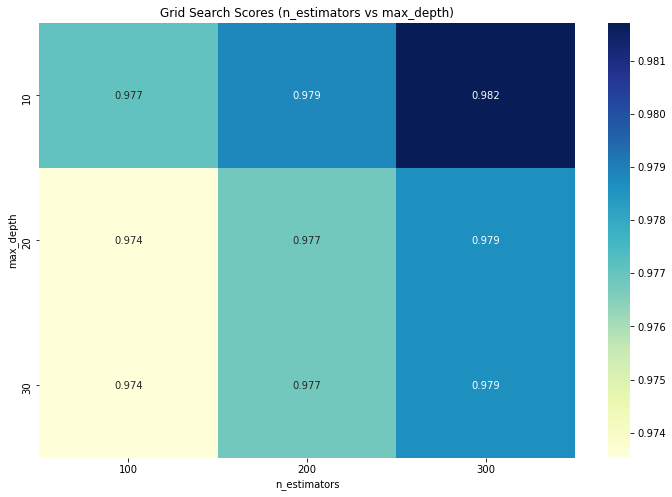



Best train_car score: 0.9817099216629657 
test_car_accuracy: 0.9937716211225037 
Best car parameters: {'max_depth': 10, 'n_estimators': 300}
Abalone



/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

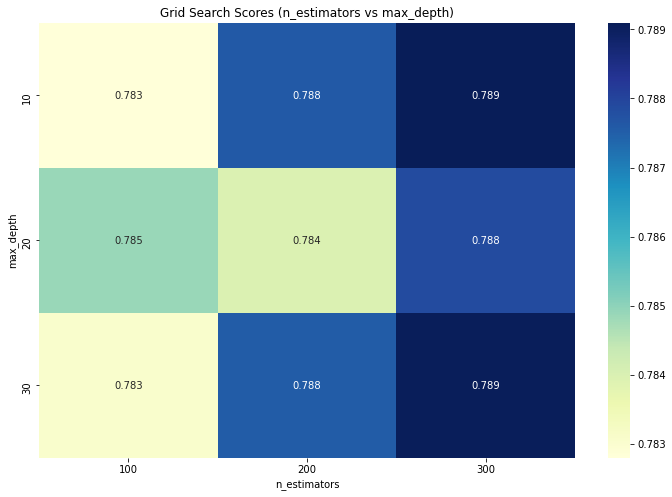



Best train_abalone score: 0.7890916956402031 
test_abalone_accuracy: 0.8072891691231604 
Best abalone parameters: {'max_depth': 10, 'n_estimators': 300}
SPAM



/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

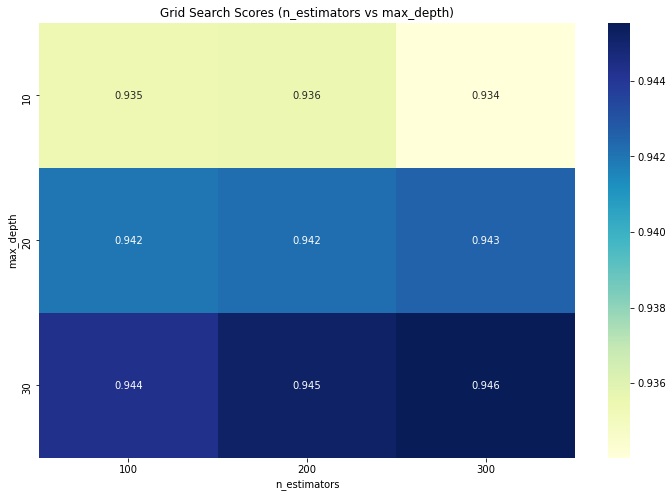



Best train_spam score: 0.9455293309992439 
test_spam_accuracy: 0.9499370275775715 
Best spam parameters: {'max_depth': 30, 'n_estimators': 300}


In [20]:
###80/20

##CAR
print("CAR\n")
# Print the imbalanced results
imbalanced_accuracy, best_params, best_score, result= tune_evaluate_random_forest(X_car, y_car, param_grid, custom_scorer, 0.2)
plot_grid_search_heatmap(result, param_grid, 'n_estimators', 'max_depth')
print('\n\nBest train_car score:', best_score, '\ntest_car_accuracy:', imbalanced_accuracy, '\nBest car parameters:', best_params)
random_forest_results["0.2"]["car"] = imbalanced_accuracy
random_forest_train["0.2"]["car"] = best_score

##Abalone
print("Abalone\n")
# Print the imbalanced results
imbalanced_accuracy, best_params, best_score, result = tune_evaluate_random_forest(X_abalone, y_abalone, param_grid, custom_scorer, 0.2)
plot_grid_search_heatmap(result, param_grid, 'n_estimators', 'max_depth')
print('\n\nBest train_abalone score:', best_score, '\ntest_abalone_accuracy:', imbalanced_accuracy, '\nBest abalone parameters:', best_params)
random_forest_results["0.2"]["abalone"] = imbalanced_accuracy
random_forest_train["0.2"]["abalone"] = best_score


##SPAM
print("SPAM\n")
# Print the imbalanced results
imbalanced_accuracy, best_params, best_score, result = tune_evaluate_random_forest(X_spam, y_spam, param_grid, custom_scorer, 0.2)
plot_grid_search_heatmap(result, param_grid, 'n_estimators', 'max_depth')
print('\n\nBest train_spam score:', best_score, '\ntest_spam_accuracy:', imbalanced_accuracy, '\nBest spam parameters:', best_params)
random_forest_results["0.2"]["spam"] = imbalanced_accuracy
random_forest_train["0.2"]["spam"] = best_score


CAR



/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

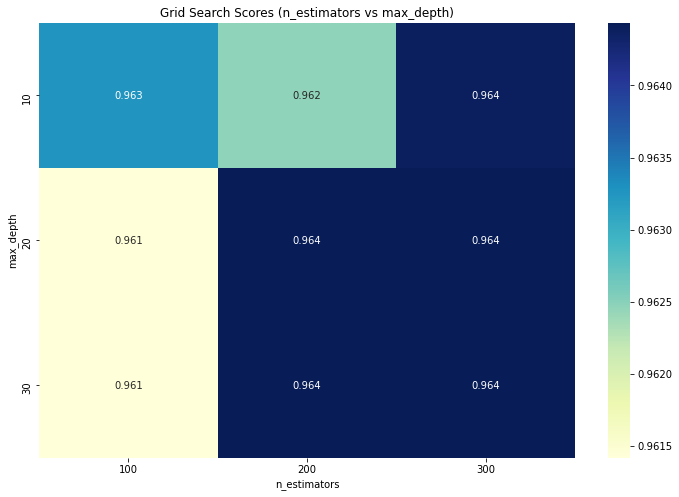



Best train_car score: 0.9644325828545384 
test_car_accuracy: 0.9695641662145095 
Best car parameters: {'max_depth': 20, 'n_estimators': 200}
Abalone



/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

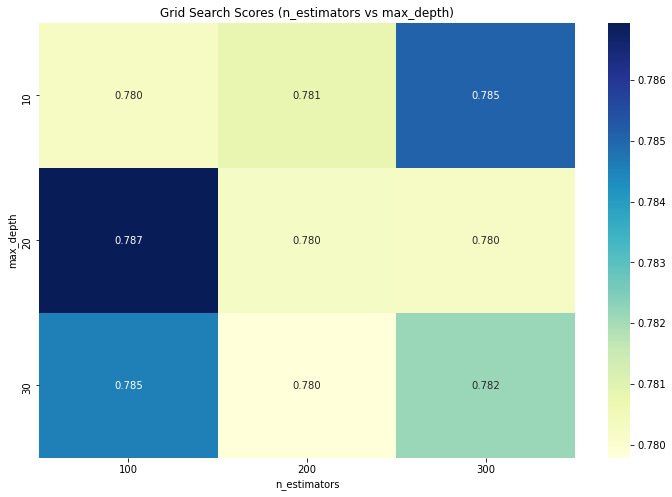



Best train_abalone score: 0.7869406124640679 
test_abalone_accuracy: 0.8000936753432425 
Best abalone parameters: {'max_depth': 20, 'n_estimators': 100}
SPAM



/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

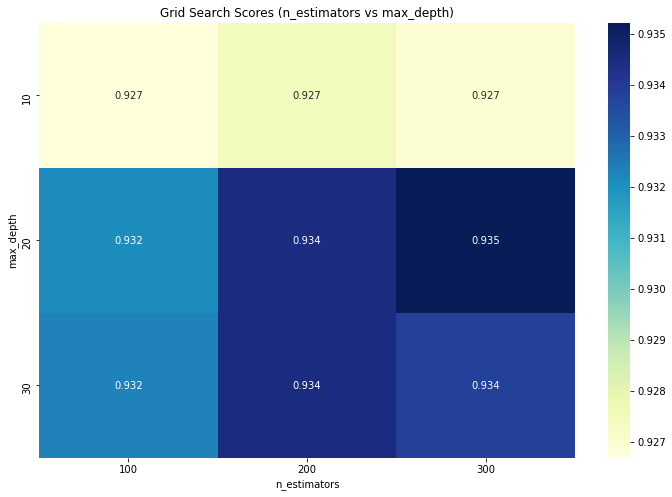



Best train_spam score: 0.9352087877270556 
test_spam_accuracy: 0.9409608942834717 
Best spam parameters: {'max_depth': 20, 'n_estimators': 300}


In [21]:
###50/50
##CAR
print("CAR\n")
# Print the imbalanced results
imbalanced_accuracy, best_params, best_score, result = tune_evaluate_random_forest(X_car, y_car, param_grid, custom_scorer, 0.5)
plot_grid_search_heatmap(result, param_grid, 'n_estimators', 'max_depth')
print('\n\nBest train_car score:', best_score, '\ntest_car_accuracy:', imbalanced_accuracy, '\nBest car parameters:', best_params)
random_forest_results["0.5"]["car"] = imbalanced_accuracy
random_forest_train["0.5"]["car"] = best_score


##Abalone
print("Abalone\n")
# Print the imbalanced results
imbalanced_accuracy, best_params, best_score, result = tune_evaluate_random_forest(X_abalone, y_abalone, param_grid, custom_scorer, 0.5)
plot_grid_search_heatmap(result, param_grid, 'n_estimators', 'max_depth')
print('\n\nBest train_abalone score:', best_score, '\ntest_abalone_accuracy:', imbalanced_accuracy, '\nBest abalone parameters:', best_params)
random_forest_results["0.5"]["abalone"] = imbalanced_accuracy
random_forest_train["0.5"]["abalone"] = best_score

##SPAM
print("SPAM\n")
# Print the imbalanced results
imbalanced_accuracy, best_params, best_score, result = tune_evaluate_random_forest(X_spam, y_spam, param_grid, custom_scorer, 0.5)
plot_grid_search_heatmap(result, param_grid, 'n_estimators', 'max_depth')
print('\n\nBest train_spam score:', best_score, '\ntest_spam_accuracy:', imbalanced_accuracy, '\nBest spam parameters:', best_params)
random_forest_results["0.5"]["spam"] = imbalanced_accuracy
random_forest_train["0.5"]["spam"] = best_score

CAR



/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

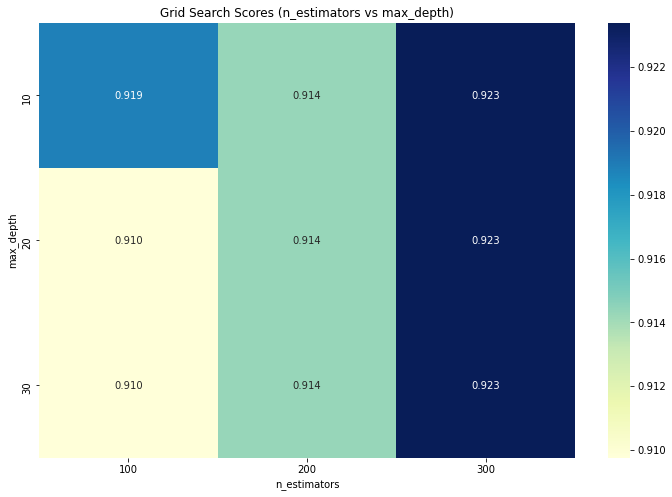



Best train_car score: 0.9233858340241319 
test_car_accuracy: 0.9396583422246794 
Best car parameters: {'max_depth': 10, 'n_estimators': 300}
Abalone



/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

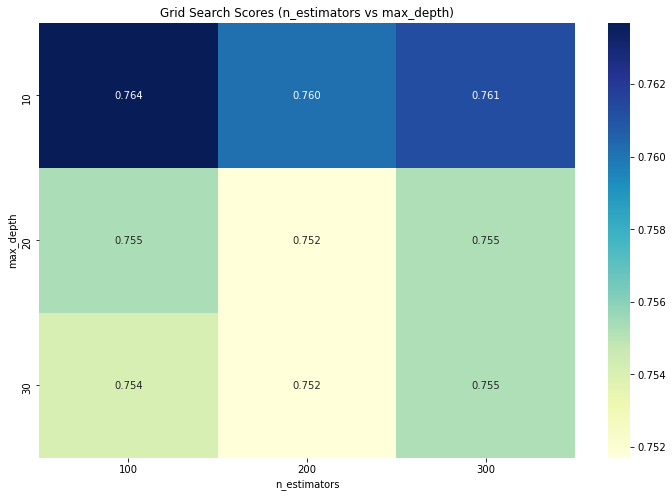



Best train_abalone score: 0.7636888607926274 
test_abalone_accuracy: 0.7842191640987352 
Best abalone parameters: {'max_depth': 10, 'n_estimators': 100}
SPAM



/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/yuyin/.local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

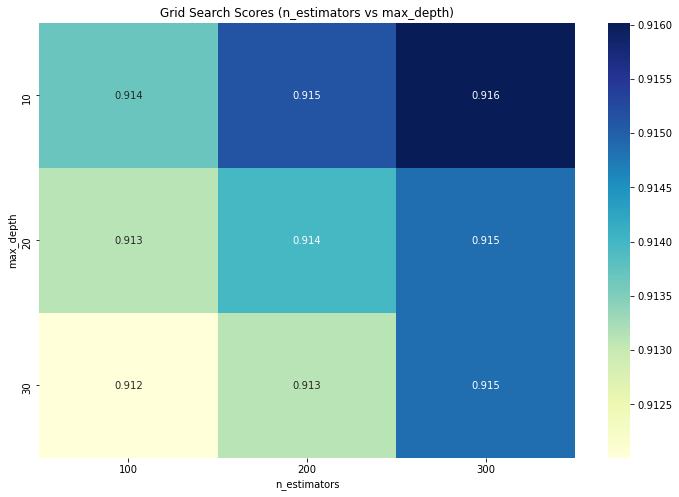



Best train_spam score: 0.9160161272747086 
test_spam_accuracy: 0.9264124090555866 
Best spam parameters: {'max_depth': 10, 'n_estimators': 300}


In [22]:
###20/80
##CAR
print("CAR\n")
# Print the imbalanced results
imbalanced_accuracy, best_params, best_score, result = tune_evaluate_random_forest(X_car, y_car, param_grid, custom_scorer, 0.8)
plot_grid_search_heatmap(result, param_grid, 'n_estimators', 'max_depth')
print('\n\nBest train_car score:', best_score, '\ntest_car_accuracy:', imbalanced_accuracy, '\nBest car parameters:', best_params)
random_forest_results["0.8"]["car"] = imbalanced_accuracy
random_forest_train["0.8"]["car"] = best_score


##Abalone
print("Abalone\n")
# Print the imbalanced results
imbalanced_accuracy, best_params, best_score, result = tune_evaluate_random_forest(X_abalone, y_abalone, param_grid, custom_scorer, 0.8)
plot_grid_search_heatmap(result, param_grid, 'n_estimators', 'max_depth')
print('\n\nBest train_abalone score:', best_score, '\ntest_abalone_accuracy:', imbalanced_accuracy, '\nBest abalone parameters:', best_params)
random_forest_results["0.8"]["abalone"] = imbalanced_accuracy
random_forest_train["0.8"]["abalone"] = best_score

##SPAM
print("SPAM\n")
# Print the imbalanced results
imbalanced_accuracy, best_params, best_score, result = tune_evaluate_random_forest(X_spam, y_spam, param_grid, custom_scorer, 0.8)
plot_grid_search_heatmap(result, param_grid, 'n_estimators', 'max_depth')
print('\n\nBest train_spam score:', best_score, '\ntest_spam_accuracy:', imbalanced_accuracy, '\nBest spam parameters:', best_params)
random_forest_results["0.8"]["spam"] = imbalanced_accuracy
random_forest_train["0.8"]["spam"] = best_score


**Plot the result**

In [23]:
splits = ['0.8', '0.5', '0.2']

In [24]:
# Extracting accuracies for each model
dt_accuracies = [decision_tree_results[split]['car'] for split in splits]
knn_accuracies = [knn_results[split]['car'] for split in splits]
rf_accuracies = [random_forest_results[split]['car'] for split in splits]

dt_train = [decision_tree_train[split]['car'] for split in splits]
kn_train = [knn_train[split]['car'] for split in splits]
rf_train = [random_forest_train[split]['car'] for split in splits]

In [ ]:
# Car
plt.figure(figsize=(10, 6))
plt.plot(splits, dt_accuracies, marker='o', color='blue', label='Decision Tree Test')
plt.plot(splits, knn_accuracies, marker='o', color='green', label='KNN Test')
plt.plot(splits, rf_accuracies, marker='o', color='red', label='Random Forest Test')

plt.plot(splits, dt_train, marker='o', color='lightblue', label='Decision Tree Train')
plt.plot(splits, kn_train, marker='o', color='lightgreen', label='KNN Train')
plt.plot(splits, rf_train, marker='o', color='#FF9999', label='Random Forest Train')

plt.title('Model Accuracy for Different Train/Test Splits On Car Dataset')
plt.xlabel('Train/Test Split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Extracting accuracies for each model
dt_accuracies = [decision_tree_results[split]['abalone'] for split in splits]
knn_accuracies = [knn_results[split]['abalone'] for split in splits]
rf_accuracies = [random_forest_results[split]['abalone'] for split in splits]

dt_train = [decision_tree_train[split]['abalone'] for split in splits]
kn_train = [knn_train[split]['abalone'] for split in splits]
rf_train = [random_forest_train[split]['abalone'] for split in splits]

In [ ]:
# Abalone
plt.figure(figsize=(10, 6))
plt.plot(splits, dt_accuracies, marker='o', color='blue', label='Decision Tree Test')
plt.plot(splits, knn_accuracies, marker='o', color='green', label='KNN Test')
plt.plot(splits, rf_accuracies, marker='o', color='red', label='Random Forest Test')

plt.plot(splits, dt_train, marker='o', color='lightblue', label='Decision Tree Train')
plt.plot(splits, kn_train, marker='o', color='lightgreen', label='KNN Train')
plt.plot(splits, rf_train, marker='o', color='#FF9999', label='Random Forest Train')

plt.title('Model Accuracy for Different Train/Test Splits On Abalone Dataset')
plt.xlabel('Train/Test Split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Extracting accuracies for each model
dt_accuracies = [decision_tree_results[split]['spam'] for split in splits]
knn_accuracies = [knn_results[split]['spam'] for split in splits]
rf_accuracies = [random_forest_results[split]['spam'] for split in splits]

dt_train = [decision_tree_train[split]['spam'] for split in splits]
kn_train = [knn_train[split]['spam'] for split in splits]
rf_train = [random_forest_train[split]['spam'] for split in splits]

In [ ]:
# Spam
plt.figure(figsize=(10, 6))
plt.plot(splits, dt_accuracies, marker='o', color='blue', label='Decision Tree Test')
plt.plot(splits, knn_accuracies, marker='o', color='green', label='KNN Test')
plt.plot(splits, rf_accuracies, marker='o', color='red', label='Random Forest Test')

plt.plot(splits, dt_train, marker='o', color='lightblue', label='Decision Tree Train')
plt.plot(splits, kn_train, marker='o', color='lightgreen', label='KNN Train')
plt.plot(splits, rf_train, marker='o', color='#FF9999', label='Random Forest Train')

plt.title('Model Accuracy for Different Train/Test Splits On Spam Dataset')
plt.xlabel('Train/Test Split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()